In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
key=""#you can get your own API Token from Tingo under API section

In [40]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [41]:
df.to_csv('AAPL.csv')

In [42]:
import pandas as pd
df=pd.read_csv('AAPL.csv')

In [43]:

df.head(4)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-08-25 00:00:00+00:00,103.74,111.11,103.50,111.110,103601599,95.853775,102.663514,95.632019,102.663514,103601599,0.0,1.0
1,AAPL,2015-08-26 00:00:00+00:00,109.69,109.89,105.05,107.085,96774611,101.351461,101.536257,97.064189,98.944491,96774611,0.0,1.0
2,AAPL,2015-08-27 00:00:00+00:00,112.92,113.24,110.02,112.250,84616056,104.335919,104.631593,101.656374,103.716852,84616056,0.0,1.0
3,AAPL,2015-08-28 00:00:00+00:00,113.29,113.31,111.54,112.170,53164407,104.677792,104.696271,103.060825,103.642933,53164407,0.0,1.0


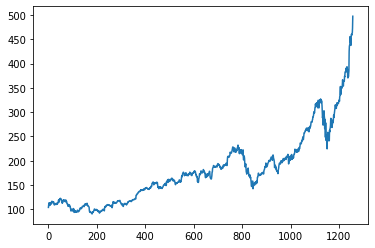

In [44]:
df1=df.reset_index()['close']
df1
plt.plot(df1)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

print(df1)

[[0.03291251]
 [0.04752665]
 [0.05546004]
 ...
 [0.91489414]
 [0.94011888]
 [1.        ]]


In [46]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [47]:
training_size,test_size

(880, 378)

In [48]:
train_data

array([[0.03291251],
       [0.04752665],
       [0.05546004],
       [0.05636882],
       [0.05506705],
       [0.04268802],
       [0.05403547],
       [0.04919684],
       [0.04649506],
       [0.05396178],
       [0.04865648],
       [0.05460038],
       [0.05862848],
       [0.06133025],
       [0.06371273],
       [0.06403203],
       [0.0579162 ],
       [0.0567618 ],
       [0.06108464],
       [0.05663899],
       [0.05889866],
       [0.06056885],
       [0.05985656],
       [0.05428108],
       [0.04597927],
       [0.04816525],
       [0.04725647],
       [0.0492214 ],
       [0.05020386],
       [0.05150562],
       [0.05020386],
       [0.04705998],
       [0.05349511],
       [0.05221791],
       [0.05268458],
       [0.04880385],
       [0.05285651],
       [0.05084246],
       [0.05253721],
       [0.05754777],
       [0.05752321],
       [0.06179692],
       [0.07058997],
       [0.06125657],
       [0.05946358],
       [0.07105664],
       [0.0741514 ],
       [0.071

In [49]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [50]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [51]:
print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [52]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [53]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 3s 202ms/step - loss: 0.0067 - val_loss: 0.0434
Epoch 2/100
13/13 [==============================] - 2s 138ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 3/100
13/13 [==============================] - 2s 141ms/step - loss: 4.8674e-04 - val_loss: 0.0027
Epoch 4/100
13/13 [==============================] - 2s 142ms/step - loss: 3.7194e-04 - val_loss: 0.0040
Epoch 5/100
13/13 [==============================] - 2s 141ms/step - loss: 3.2429e-04 - val_loss: 0.0037
Epoch 6/100
13/13 [==============================] - 2s 141ms/step - loss: 3.0408e-04 - val_loss: 0.0043
Epoch 7/100
13/13 [==============================] - 2s 140ms/step - loss: 2.9048e-04 - val_loss: 0.0037
Epoch 8/100
13/13 [==============================] - 2s 141ms/step - loss: 2.8225e-04 - val_loss: 0.0036
Epoch 9/100
13/13 [==============================] - 2s 140ms/step - loss: 2.7709e-04 - val_loss: 0.0040
Epoch 10/100
13/13 [==============================] - 2s 141ms/

In [58]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [59]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [60]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

153.0516884730691

In [61]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

280.71905587089555

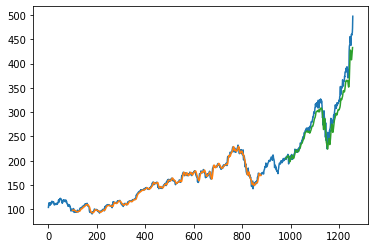

In [62]:
#Plotting train predict and test predict 
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [63]:
len(test_data)

378

In [66]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [68]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.36982364788524824,
 0.37969740138527286,
 0.3710517266787837,
 0.42277840546249457,
 0.41531168639779925,
 0.43162057277594923,
 0.4363363953431252,
 0.44925578425111756,
 0.48315075895269444,
 0.47671562607456897,
 0.4822665422213489,
 0.4727120892076436,
 0.4582944441715381,
 0.43726973522621215,
 0.45625583337426934,
 0.45362774475610346,
 0.4731296359974456,
 0.47362086751485977,
 0.46234710419020475,
 0.4848209461119025,
 0.4997298226654222,
 0.48811219727857735,
 0.498157881809697,
 0.5089649751928084,
 0.5165053789851156,
 0.5241440290809058,
 0.5398388760622881,
 0.5518249250871936,
 0.5429827577737388,
 0.5337476052463526,
 0.5383897430859165,
 0.5338949747015768,
 0.55170211720784,
 0.5472319103993711,
 0.5621899101046324,
 0.5563442550474039,
 0.5613548165250282,
 0.5560495161369554,
 0.559439013607113,
 0.559782875669303,
 0.559021466817311,
 0.5686250429827578,
 0.5722847177874931,
 0.5766566782924792,
 0.5697794370486811,
 0.5923269636979909,
 0.5971410325686496,
 0.62

In [69]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.88060284]
101
1 day input [0.3796974  0.37105173 0.42277841 0.41531169 0.43162057 0.4363364
 0.44925578 0.48315076 0.47671563 0.48226654 0.47271209 0.45829444
 0.43726974 0.45625583 0.45362774 0.47312964 0.47362087 0.4623471
 0.48482095 0.49972982 0.4881122  0.49815788 0.50896498 0.51650538
 0.52414403 0.53983888 0.55182493 0.54298276 0.53374761 0.53838974
 0.53389497 0.55170212 0.54723191 0.56218991 0.55634426 0.56135482
 0.55604952 0.55943901 0.55978288 0.55902147 0.56862504 0.57228472
 0.57665668 0.56977944 0.59232696 0.59714103 0.62300437 0.64474137
 0.60313406 0.61025691 0.62054821 0.64287469 0.64167117 0.64201503
 0.63707815 0.659552   0.67836616 0.66247482 0.67421526 0.64668173
 0.66669942 0.67411701 0.67242226 0.67242226 0.69634524 0.69349609
 0.71481554 0.71884364 0.72048927 0.71614187 0.73166478 0.73822272
 0.72640861 0.7244928  0.7444368  0.73109987 0.73377708 0.69027853
 0.68801886 0.70958393 0.69428207 0.71184359 0.72314192 0.82207594
 0.84838139 0.85552881 0.8594341  0

In [70]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [71]:
len(df1)

1258

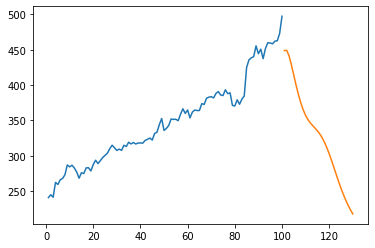

In [72]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

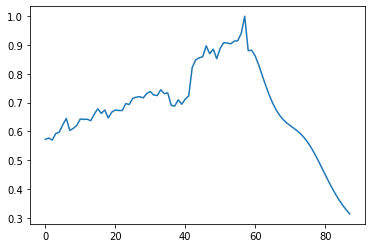

In [73]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [74]:
df3=scaler.inverse_transform(df3).tolist()